# Stock Prices Prediction Using Machine Learning and Deep Learning Techniques

Aishwarya Singh, OCTOBER 25, 2018. [Here](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/)

Introduction
Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. physhological, rational and irrational behaviour, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy.

Can we use machine learning as a game changer in this domain? Using features like the latest announcements about an organization, their quarterly revenue results, etc., machine learning techniques have the potential to unearth patterns and insights we didn’t see before, and these can be used to make unerringly accurate predictions.

In this article, we will work with historical data about the stock prices of a publicly listed company. We will implement a mix of machine learning algorithms to predict the future stock price of this company, starting with simple algorithms like averaging and linear regression, and then move on to advanced techniques like Auto ARIMA and LSTM.

The core idea behind this article is to showcase how these algorithms are implemented. I will briefly describe the technique and provide relevant links to brush up on the concepts as and when necessary. In case you’re a newcomer to the world of time series, I suggest going through the following articles first:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)



## Table of Contents
1. Understanding the Problem Statement
2. Moving Average
3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import MinMaxScaler

#to plot within notebook
%matplotlib inline

#setting figure size
rcParams['figure.figsize'] = 20, 10

#for normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))

In [20]:
#read file
#df = pd.read_csv('.\\data\\nse.tatagloblMar2020.data.csv')
df = pd.read_csv('.\\data\\nse.tataglobl11.data.csv')
print('\n Shape of the data:\n')
print(df.shape)
print('\n Data\'s Info:\n')
print(df.info())
print('\n First data rows:')
df.head(5)


 Shape of the data:

(1235, 8)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
Date                    1235 non-null object
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null float64
Turnover (Lacs)         1235 non-null float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB
None

 First data rows:


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


## 1. Understanding the Problem Statement
There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.

- The columns **Open** and **Close** represent the starting and final price at which the stock is traded on a particular day.
- **High**, **Low** and **Last** represent the maximum, minimum, and last price of the share for the day.
- **Total Trade Quantity** is the number of shares bought or sold in the day and **Turnover (Lacs)** is the turnover of the particular company on a given date.

**Note**. Another important thing to note is that the market is closed on weekends and public holidays.Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018, 7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

The `profit or loss calculation is usually determined by the closing price` of a stock for the day, hence we will **consider the closing price as the target variable**. Let’s plot the target variable to understand how it’s shaping up in our data:

## 2. Moving Average

The predicted closing price for each day will be the average of a set of previously observed values. Instead of using the simple average, we will be using the `moving average techniqu`e which uses the latest set of values for each prediction. In other words, for each subsequent step, the predicted values are taken into consideration while removing the oldest observed value from the set. Here is a simple figure that will help you understand this with more clarity.

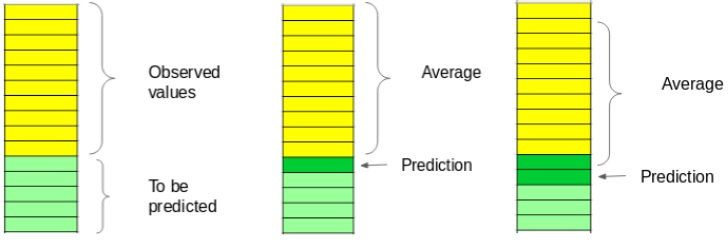

We will implement this technique on our dataset. The first step is to create a dataframe that contains only the Date and Close price columns, then split it into train and validation sets to verify our predictions.

In [24]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d') # 	2018-10-08
df.index = df['Date']
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [23]:
# creating dataframe with date and the target variable

# axis{0=‘index’, 1=‘columns’}, default 0 
# The axis along which to sort. The value 0 identifies the rows, and 1 identifies the columns.

data = df.sort_index(ascending=True, axis=0)
data.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [26]:
# create empty dataset with dimension: range(start, finish): row=0 to len(df) 'all rows'
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
new_data.head(5)

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [28]:
# copy values to new structure
for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data ['Close'][i]
    
new_data.head(5)

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


**Note**: While `splitting the data into train and validation set`, we **cannot use random splitting since that will destroy the time component**. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

In [29]:
# splitting into train (0:987) and validation (987:**finish**)
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of trainning set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of trainning set:
(987, 2)

 Shape of validation set:
(248, 2)


In the next step, we will create predictions for the validation set and check the RMSE using the actual values.

In [43]:
# making predictions
preds = []
for i in range(0, valid.shape[0]):
    a = train['Close'][len(train)-248+i].sum() + sum(preds)
    b = a/248
    preds.append(b)

In [45]:
# checking the results (RMSE value)
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
print('\n RMSE value on validation set:\n')
print(rms)


 RMSE value on validation set:

263.223226352883


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


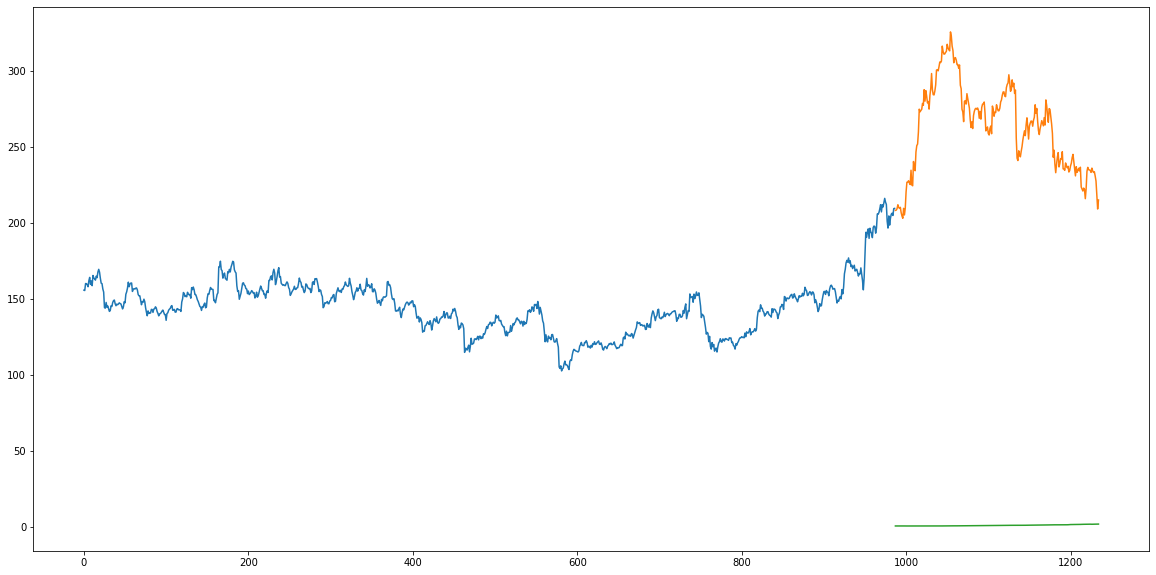

In [54]:
# copy predictions into valid data
valid['Predictions'] = 0
valid['Predictions'] = preds

# plot predict values
plt.plot(train['Close'])
#plt.plot(valid['Close'])
plt.plot(valid[['Close','Predictions']])

The RMSE value is close to 263.22 but the results are not very promising (as you can gather from the plot). The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease).

## Linear Regression

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the `independent variables` and the `dependent variable`.

**Note**. For our problem statement, we do not have a set of independent variables. We have only the dates instead. Let us use the date column to extract features like – day, month, year,  mon/fri etc. and then fit a linear regression model.

### Implementation

We will first sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [65]:
# setting index as date values
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

# sorting
data = df.sort_index(ascending=True, axis=0)

# creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date','Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
new_data.head(5)    

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [71]:
# create features
#  conda install -c pytorch -c fastai fastai  
# from fastai.structured import add_datepart
from fastai.tabular import add_datepart

add_datepart(new_data, 'Date')

new_data.head(5)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1381190400
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1381276800
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1381363200
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1381449600
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1381708800


In [76]:
# remove atribute 'Elapsed', axis=1 means colummn
new_data.drop('Elapsed', axis=1, inplace=True)
new_data.head(10)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False
5,158.05,2013,10,42,15,1,288,False,False,False,False,False,False
6,162,2013,10,42,17,3,290,False,False,False,False,False,False
7,164.2,2013,10,42,18,4,291,False,False,False,False,False,False
8,159.6,2013,10,43,21,0,294,False,False,False,False,False,False
9,161.85,2013,10,43,22,1,295,False,False,False,False,False,False


This creates features such as:

‘Year’, ‘Month’, ‘Week’, ‘Day’, ‘Dayofweek’, ‘Dayofyear’, ‘Is_month_end’, ‘Is_month_start’, ‘Is_quarter_end’, ‘Is_quarter_start’,  ‘Is_year_end’, and  ‘Is_year_start’.

#### Additional features

Apart from this, we can add our own set of features that we believe would be relevant for the predictions. For instance, my **hypothesis is that the first and last days of the week could potentially affect the closing price of the stock far more than the other days**. So I have created a feature that identifies whether a given day is Monday/Friday or Tuesday/Wednesday/Thursday. This can be done using the following lines of code:

In [77]:
new_data['mon_fri'] = 0
for i in range(0, len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

new_data.head(10)        

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1
5,158.05,2013,10,42,15,1,288,False,False,False,False,False,False,0
6,162,2013,10,42,17,3,290,False,False,False,False,False,False,0
7,164.2,2013,10,42,18,4,291,False,False,False,False,False,False,1
8,159.6,2013,10,43,21,0,294,False,False,False,False,False,False,1
9,161.85,2013,10,43,22,1,295,False,False,False,False,False,False,0


We will now split the data into train and validation sets to check the performance of the model.

In [78]:
# split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']

x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
# make predictions and find the rmse
preds = model.predict(x_valid)

rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

121.16291596522855

The RMSE value is higher than the previous technique, which clearly shows that linear regression has performed poorly. Let’s look at the plot and understand why linear regression has not done well:

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


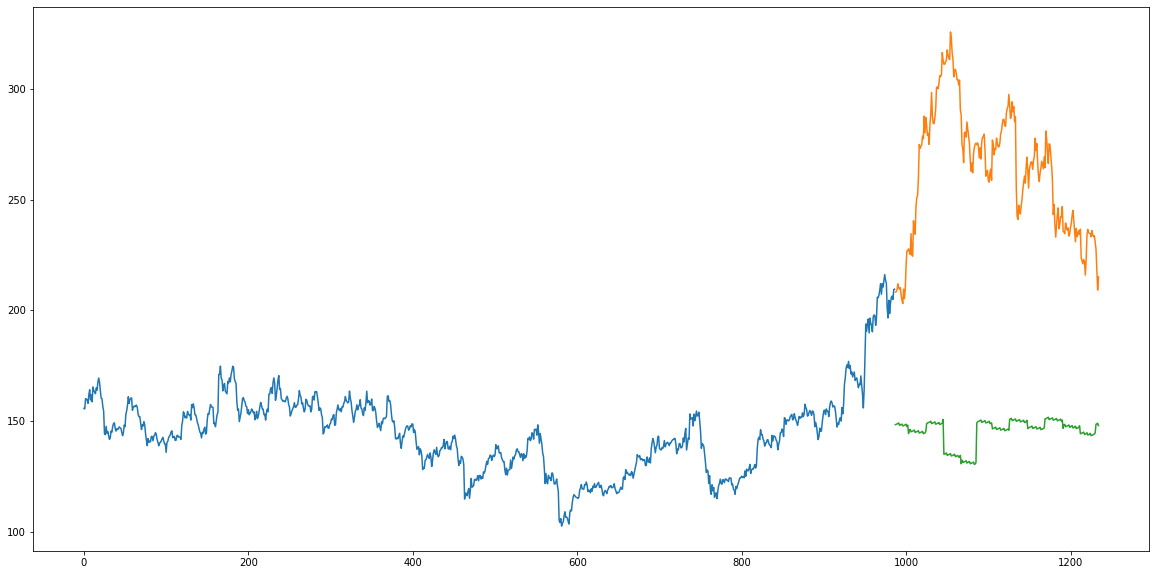

In [81]:
# add predictions to valid set
valid['Predictions'] = 0
valid['Predictions'] = preds

# add index value to train and valid set
valid.index = new_data[987:].index
train.index = new_data[:987].index

# plot
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

#### Inference

Linear regression is a simple technique and quite easy to interpret, but there are a few obvious disadvantages. One problem in using **regression algorithms is that the model overfits to the date and month column. Instead of taking into account the previous values from the point of prediction**, the model will consider the value from the same date a month ago, or the same date/month a year ago.

**Note**. As seen from the plot above, for January 2016 and January 2017, there was a drop in the stock price. The model has predicted the same for January 2018.

## k-Nearest Neighbours

Another interesting ML algorithm that one can use here is kNN (k nearest neighbours). Based on the independent variables, kNN finds the similarity between new data points and old data points.

### Implementation

In [85]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [86]:
x_train.head(5)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,2013,10,42,14,0,287,False,False,False,False,False,False,1


In [87]:
x_valid.head(5)

,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
987,2017,10,41,9,0,282,False,False,False,False,False,False,1
988,2017,10,41,10,1,283,False,False,False,False,False,False,0
989,2017,10,41,11,2,284,False,False,False,False,False,False,0
990,2017,10,41,12,3,285,False,False,False,False,False,False,0
991,2017,10,41,13,4,286,False,False,False,False,False,False,1


In [88]:
# Using the same train and validation set from the last section:
# scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [89]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.818182,0.769231,0.233333,0.166667,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.818182,0.769231,0.266667,0.333333,0.771978,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.818182,0.769231,0.300000,0.500000,0.774725,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.818182,0.769231,0.333333,0.666667,0.777473,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.818182,0.788462,0.433333,0.000000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
x_valid.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.818182,0.784314,0.266667,0.00,0.776243,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.818182,0.784314,0.300000,0.25,0.779006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.818182,0.784314,0.333333,0.50,0.781768,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.818182,0.784314,0.366667,0.75,0.784530,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.818182,0.784314,0.400000,1.00,0.787293,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [93]:
# using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [95]:
#fit the model and make predictions
model.fit(x_train, y_train)
preds = model.predict(x_valid)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [96]:
# results
# rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

115.17086550026721

There is not a huge difference in the RMSE value, but a plot for the predicted and actual values should provide a more clear understanding.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


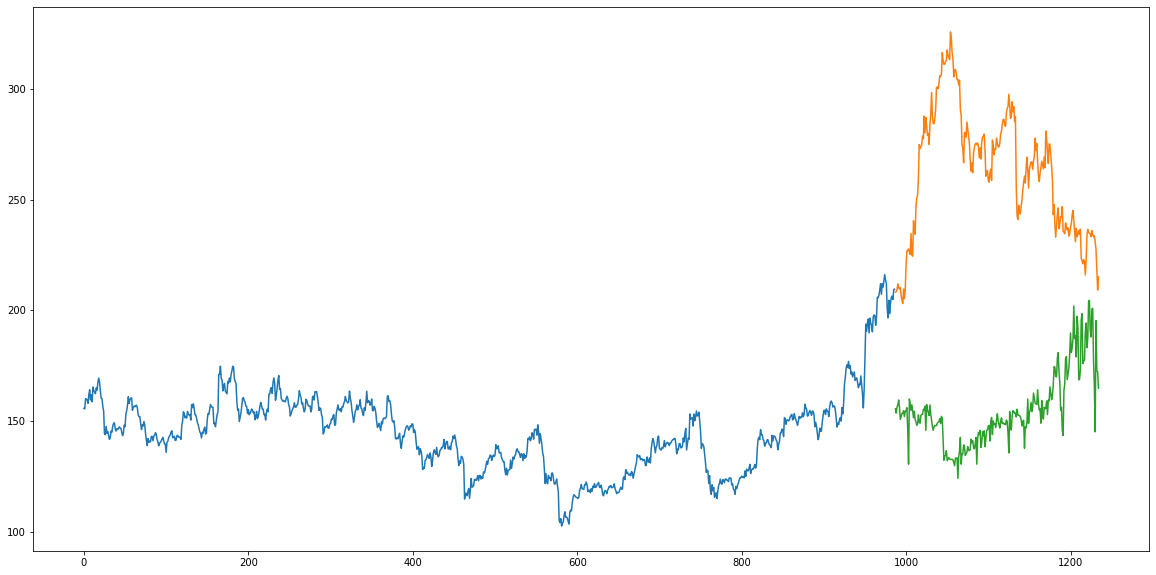

In [97]:
# copy pridictions to valid set
valid['Predictions'] = 0
valid['Predictions'] = preds

# plot
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

#### Inference
The RMSE value is almost similar to the linear regression model and the plot shows the same pattern. Like linear regression, kNN also identified a drop in January 2018 since that has been the pattern for the past years. We can safely say that regression algorithms have not performed well on this dataset.

## Auto ARIMA

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error. To read more about how auto ARIMA works, refer to this article:

In [129]:
# conda install -c alkaline-ml pmdarima 
# restar computer after install
from pyramid.arima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']


model = auto_arima(training, 
                   start_p=1, 
                   start_q=1,
                   max_p=3, 
                   max_q=3, 
                   m=12,
                   start_P=0, 
                   seasonal=True,
                   d=1, 
                   D=1, 
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast, index = valid.index, columns=['Prediction'])

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

44.954584993246954

In [ ]:
# plot
plt.plot(train['Close'])
plt.plot(valid['Close'])

# plot
plt.plot(forecast['Prediction'])

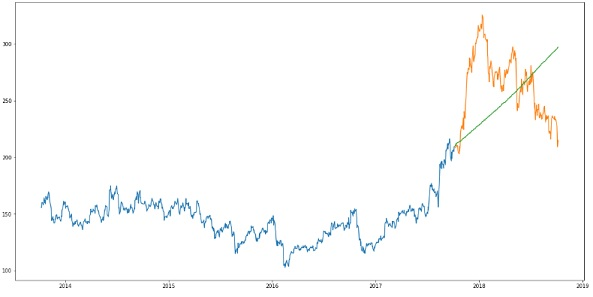

#### Inference

As we saw earlier, an auto ARIMA model uses past data to understand the pattern in the time series. Using these values, the model captured an increasing trend in the series. Although the predictions using this technique are far better than that of the previously implemented machine learning models, these predictions are still not close to the real values.

As its evident from the plot, the model has captured a trend in the series, but does not focus on the seasonal part. In the next section, we will implement a time series model that takes both trend and seasonality of a series into account.

## Prophet

There are a number of time series techniques that can be implemented on the stock prediction dataset, but most of these techniques require a lot of data preprocessing before fitting the model. Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).

Prophet tries to capture the seasonality in the past data and works well when the dataset is large. Here is an interesting article that explains Prophet in a simple and intuitive manner:

In [131]:
#importing prophet
from fbprophet import Prophet

In [132]:
#importing prophet
from fbprophet import Prophet

#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

# preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

# train and validation
train = new_data[:987]
valid = new_data[987:]

# fit the model
model = Prophet()
model.fit(train)

# predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

56.93496825202469

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



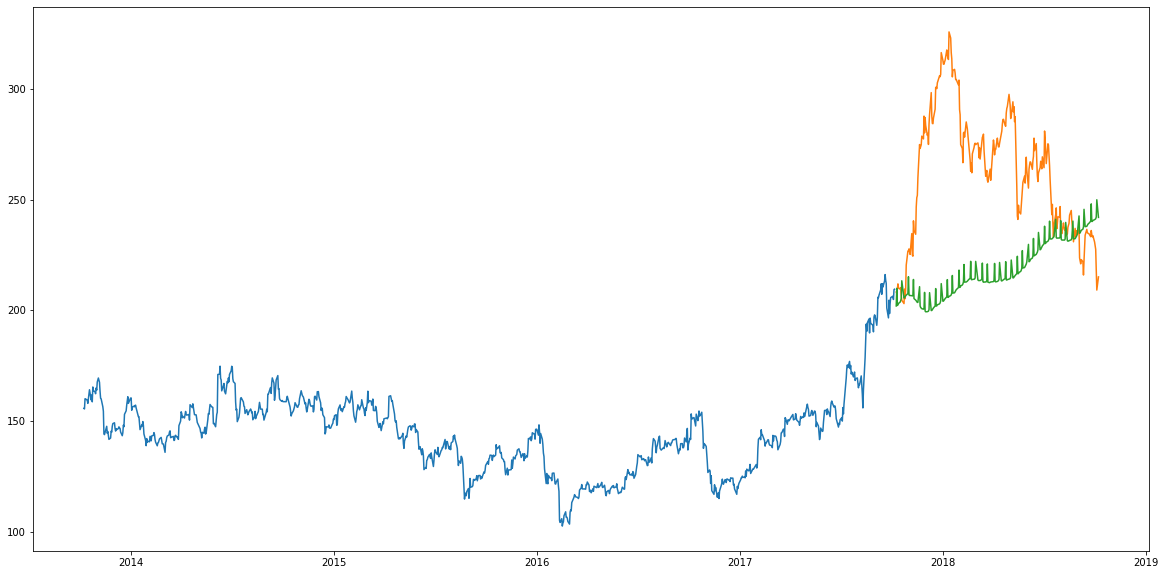

In [134]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

#### Inference

Prophet (like most time series forecasting techniques) tries to capture the trend and seasonality from past data. This model usually performs well on time series datasets, but fails to live up to it’s reputation in this case.

As it turns out, stock prices do not have a particular trend or seasonality. It highly depends on what is currently going on in the market and thus the prices rise and fall. Hence forecasting techniques like ARIMA, SARIMA and Prophet would not show good results for this particular problem.

## Long Short Term Memory (LSTM)

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output

In [137]:
# conda install -c anaconda tensorflow 
# importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)

new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

# setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

# creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

# predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 51s - loss: 0.0010


In [138]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

18.851613360098447

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



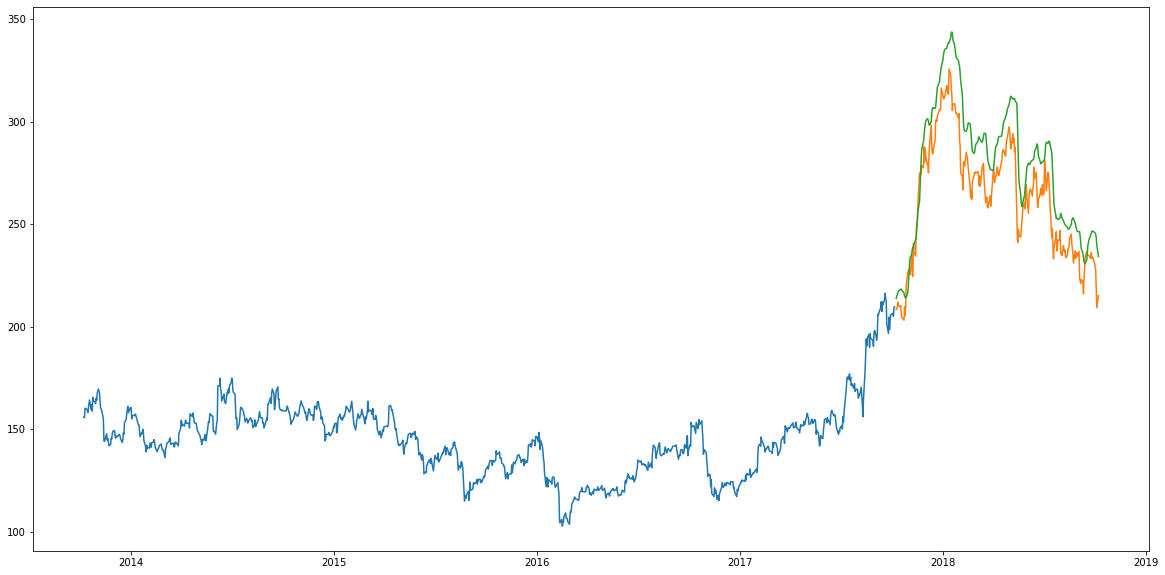

In [139]:
#for plotting
train = new_data[:987]
valid = new_data[987:]

valid['Predictions'] = closing_price

plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

#### Inference

Wow! The LSTM model can be tuned for various parameters such as changing the number of LSTM layers, adding dropout value or increasing the number of epochs. But are the predictions from LSTM enough to identify whether the stock price will increase or decrease? Certainly not!

As I mentioned at the start of the article, stock price is affected by the news about the company and other factors like demonetization or merger/demerger of the companies. There are certain intangible factors as well which can often be impossible to predict beforehand.

## End Notes

Time series forecasting is a very intriguing field to work with, as I have realized during my time writing these articles. There is a perception in the community that it’s a complex field, and while there is a grain of truth in there, it’s not so difficult once you get the hang of the basic techniques.